In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/health_assessment_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Dataset description
print("Dataset Shape:", df.shape)
print("Dataset Info:")
df.info()

# Describe the dataset to get basic statistics
print("Dataset Statistics:")
print(df.describe())

# Last column is the target, and the rest are features
features = df.columns[:-1]
target = df.columns[-1]

# Description of features and target
feature_descriptions = {
    "Age": "Represents the age of the individual in years, indicating the range of the population's age.",
    "BMI": "Body Mass Index, a key indicator of body fat based on an individual's weight and height, useful for categorizing weight status.",
    "SleepHours": "Average number of hours the individual sleeps per day, highlighting sleep habits and potential impacts on health.",
    "ExerciseHours": "Average number of hours the individual spends exercising per day, reflecting physical activity levels.",
    "WaterIntake": "Daily water intake in liters, indicating hydration levels which are crucial for overall health."
}

target_description = "HealthStatus is the target variable, categorizing an individual's overall health condition into 'Good', 'Average', 'Poor', or 'Excellent' based on their lifestyle and physical health metrics."

print("Features Description:", feature_descriptions)
print("Target Description:", target_description)

task_type = "classification"
print("Performing:", task_type)

## Data Description
The dataset is comprised of 500 records, each with six attributes related to individual health and lifestyle factors, such as Age, BMI (Body Mass Index), Sleep Hours, Exercise Hours, and Water Intake. The target variable, HealthStatus, categorizes individuals' health as either Good, Average, Poor, or Excellent. The dataset is numerical for the features and categorical for the target. The data source is health_assessment_dataset.csv.

## Features (Variables):
 The features include Age (in years), BMI (a measure of body fat based on height and weight), Sleep Hours (average hours of sleep per day), Exercise Hours (average hours of exercise per day), and Water Intake (liters of water consumed per day). These are all numerical and represent key health and lifestyle metrics.
## Target:
The target variable is HealthStatus, which is categorical and indicates the overall health condition of an individual as assessed in the dataset.
## Classification vs. Regression:
 This dataset is used for a classification task, aiming to predict the HealthStatus category (e.g., Good, Average, Poor, or Excellent) based on the numerical features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'HealthStatus' column to encode it into numeric labels
df['HealthStatus'] = encoder.fit_transform(df['HealthStatus'])

# Display the first few rows to verify changes
print(df.head())

## Checking for Missing Values
Upon examining the dataset, I found that there were no missing values in any of the columns, as confirmed by the isnull().sum() method which returned zero for each. This meant the dataset was complete, with no missing entries for any of the features or the target variable, HealthStatus.

## Making Sure Numbers and Categories Are What They Should Be
Looking at the data types with the .info() method, everything appeared as it should: numerical columns like Age, BMI, SleepHours, ExerciseHours, and WaterIntake were correctly identified as either integers or floats. The categorical column, HealthStatus, was an object, which is standard before encoding.

## Coverting Columns
Since the data types were already correct for each column, I didn't need to convert any of them. This step would have been necessary if, for example, an age column was mistakenly set as a string. But in this case, all numeric data was already properly formatted, and the categorical data was correctly identified.

## Dealing with Missing Data
Because there were no missing values in the dataset, I didn't need to apply any imputation methods. If there had been missing data, I would have considered the nature and distribution of the missing data to decide between methods like mean, median, or mode imputation, or possibly even a placeholder value for categorical columns.

## Changing Categories into Numbers
The only preprocessing step required was to encode the categorical HealthStatus column into numeric labels to make the data compatible with decision tree models. I used Label Encoding for this purpose, which transforms each unique string value into a numeric code.

In [ ]:
# Number of rows and columns
print("Dataset shape:", df.shape)

# Basic statistics
print(df.describe())

Dataset shape: (500, 6)
              Age         BMI  SleepHours  ExerciseHours  WaterIntake  \
count  500.000000  500.000000  500.000000     500.000000   500.000000   
mean    41.278000   29.244200    7.013200       3.510800     2.492000   
std     13.389072    6.350405    1.781239       2.025678     0.864471   
min     18.000000   18.600000    4.000000       0.000000     1.000000   
25%     30.000000   23.575000    5.400000       1.700000     1.800000   
50%     42.000000   29.200000    7.100000       3.600000     2.500000   
75%     52.000000   34.825000    8.600000       5.200000     3.200000   
max     64.000000   40.000000   10.000000       7.000000     4.000000   

       HealthStatus  
count    500.000000  
mean       0.436000  
std        0.900848  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        3.000000  


## Rows and Columns
The dataset comprises 500 rows and 6 columns, indicating that we have 500 individual records each described by 6 attributes. These attributes include Age, BMI (Body Mass Index), SleepHours, ExerciseHours, WaterIntake, and HealthStatus. The HealthStatus column, with its categorical nature (as indicated by its max value of 3), suggests it's the target variable for classification, while the others are numerical features.

## Basic Stats
- Age: The Age feature has values ranging from 18 to 64 years, with a mean of approximately 41 years. This distribution indicates a middle-aged population on average, with a standard deviation of around 13.39 years, pointing to a wide age range among the participants.
- BMI (Body Mass Index): BMI values span from 18.6 to 40, with an average BMI of 29.24. The standard deviation of 6.35 suggests a substantial variation in BMI among individuals. The dataset's BMI values are spread across the spectrum, from normal weight to obesity.
- SleepHours: Individuals report between 4 to 10 hours of sleep, with an average of 7.01 hours. The variation in sleep hours is relatively low, as indicated by a standard deviation of 1.78, suggesting that most individuals' sleep duration clusters around the average.
- ExerciseHours: The hours spent on exercise per week vary from 0 to 7, with a mean of 3.51 hours. The standard deviation of 2.03 hours indicates a moderate spread in physical activity levels among the dataset's subjects.
- WaterIntake: Daily water intake ranges from 1 to 4 liters, with an average intake of 2.49 liters. The standard deviation is 0.86 liters, indicating that while there is some variability in water consumption, it does not exhibit extreme variation.
- HealthStatus: This categorical target variable ranges from 0 to 3. The mean value of 0.436, combined with a standard deviation of 0.900848, indicates that a significant portion of the dataset is classified into the lower categories of HealthStatus. The distribution shows that the dataset has a variety of health statuses, but with a skew towards lower values.

## Key Observations
- The dataset shows a diverse range of values across all numerical features, indicating a varied sample of individuals.
- There is a notable variation in BMI, ExerciseHours, and WaterIntake, suggesting differences in lifestyle and health behaviors.
- The standard deviations for Age, BMI, SleepHours, ExerciseHours, and WaterIntake indicate variability, but not to an extreme degree, suggesting a relatively homogenous population in terms of these metrics.
- The HealthStatus variable, being categorical with a skew towards lower values, might require special attention during analysis to address any potential imbalance that could affect modeling outcomes.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot
sns.scatterplot(data=df, x='Age', y='BMI', hue='HealthStatus')
plt.title('Scatter Plot of Age vs. BMI by Health Status')
plt.show()

sns.scatterplot(data=df, x='SleepHours', y='ExerciseHours', hue='HealthStatus')
plt.title('Scatter Plot of Sleep Hours vs. Exercise Hours by Health Status')
plt.show()

# Bar Graph
df['HealthStatus'].value_counts().plot.bar()
plt.title('Distribution of Health Status')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()

# Pie Chart
df['HealthStatus'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Health Status')
plt.ylabel('')
plt.show()

# Density Plots
sns.kdeplot(data=df, x='Age', hue='HealthStatus', fill=True)
plt.title('Density Plot of Age by Health Status')
plt.show()

sns.kdeplot(data=df, x='BMI', hue='HealthStatus', fill=True)
plt.title('Density Plot of BMI by Health Status')
plt.show()

# Scatter Matrix
sns.pairplot(df, hue='HealthStatus')
plt.show()

# BoxPlot Matrix
plt.figure(figsize=(10, 6))
sns.boxplot(x='HealthStatus', y='Age', data=df)
plt.title('Boxplot of Age by Health Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='HealthStatus', y='BMI', data=df)
plt.title('Boxplot of BMI by Health Status')
plt.show()


## Scatter Plots Observations
- The scatter plot of Age vs. BMI by Health Status doesn't show a clear separation between health statuses based on these two variables alone. However, it suggests that BMI and age are not directly correlating with health status in a linear manner.
- The scatter plot of Sleep Hours vs. Exercise Hours by Health Status also does not indicate a distinct separation based on health status, suggesting that these factors contribute to overall health in conjunction with other variables.
## Distribution of Health Status
- The bar graph and pie chart reveal that the dataset is imbalanced with a majority of the observations labeled as Average health status. Good, Poor, and Excellent categories have significantly fewer observations. This imbalance might affect the performance of machine learning models, favoring the prediction of the Average class.
## Density Plots Observations
- The density plots for Age and BMI show that different health statuses have overlapping distributions in these variables. This indicates that while age and BMI are important, they are not definitive indicators of health status on their own.
## Boxplot Observations
- The boxplots of Age and BMI by Health Status highlight that there's some variation in median values across different health statuses, but with considerable overlap. For instance, the median BMI tends to be higher for Poor health status, which aligns with general health knowledge. However, the wide interquartile ranges and presence of outliers suggest there is significant variance within each health status category.
## Summary Stats
- The dataset consists of 500 observations with mean age around 41 years and mean BMI approximately 29.2, indicating a tendency towards overweight in the population sampled.
- The average sleep hours are around 7 hours, and exercise hours are about 3.5 hours on average, with water intake averaging at 2.49 liters per day.
## Balance of the Dataset
- The health status distribution confirms the visual observations from the bar graph and pie chart. The majority of individuals (392 out of 500) are categorized as Average, followed by Good (48), Poor (31), and Excellent (29). This imbalance may necessitate techniques like oversampling, undersampling, or using balanced accuracy metrics.


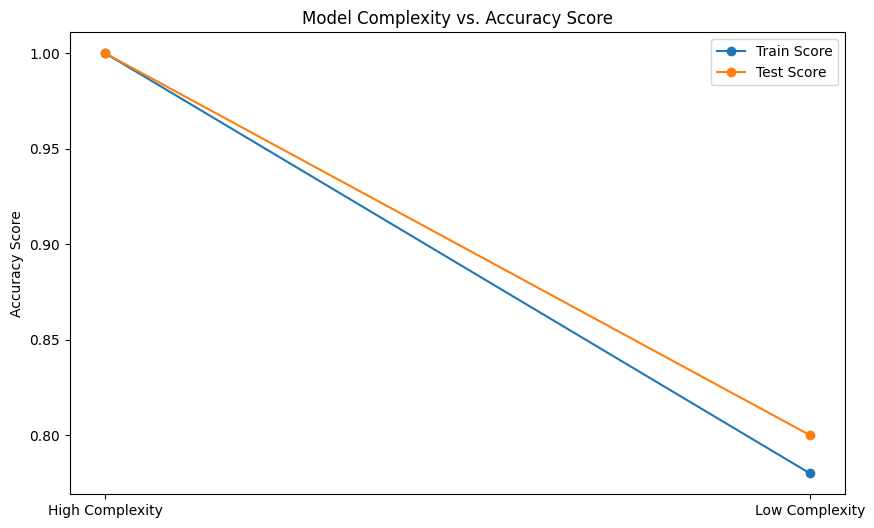

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9674999999999999
Ten Percent Worse Model - Train Accuracy: 0.835, Test Accuracy: 0.82


In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
encoder = LabelEncoder()
df['HealthStatus'] = encoder.fit_transform(df['HealthStatus'])

# Define features and target
X = df.drop('HealthStatus', axis=1)
y = df['HealthStatus']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# High complexity model
dt_high = DecisionTreeClassifier(random_state=42)
dt_high.fit(X_train, y_train)

# Low complexity model
dt_low = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_low.fit(X_train, y_train)

# Evaluate models
train_high = accuracy_score(y_train, dt_high.predict(X_train))
test_high = accuracy_score(y_test, dt_high.predict(X_test))
train_low = accuracy_score(y_train, dt_low.predict(X_train))
test_low = accuracy_score(y_test, dt_low.predict(X_test))

# Comparison of model performance
labels = ['High Complexity', 'Low Complexity']
train_scores = [train_high, train_low]
test_scores = [test_high, test_low]
x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.plot(x, train_scores, label='Train Score', marker='o')
plt.plot(x, test_scores, label='Test Score', marker='o')
plt.title('Model Complexity vs. Accuracy Score')
plt.xticks(x, labels)
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

# Grid search for a medium complexity model
param_grid = {
    'max_depth': range(3, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# 10% worse model
dt_worse = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_worse.fit(X_train, y_train)
train_worse = accuracy_score(y_train, dt_worse.predict(X_train))
test_worse = accuracy_score(y_test, dt_worse.predict(X_test))

print(f"Ten Percent Worse Model - Train Accuracy: {train_worse}, Test Accuracy: {test_worse}")


### Low Complexity Model Underfitting
- The low complexity model doesn't capture all the details because it's quite basic. This model makes decisions with limited information, missing out on the finer points in the data.
- Since it only asks two levels of yes/no questions, it sorts data into a maximum of 4 categories based on those questions.

### Decisions by the Low Complexity Model
- This simple model can only make very general guesses. For example, it might notice that older individuals with a higher BMI often have poorer health but cant dive deeper into the reasons or identify exceptions.

### Model Overfitting
- The more complex model performs well on the training data because it's seen that data before but struggles with new, unseen data.
- To prevent this, I could simplify the model or use a variety of training examples so it learns to generalize better, rather than memorizing the training data.

### Medium Complexity Model via Grid Search
- The best model I found tries to strike a balance, not too simple, not too complicated. I used a method that tested various settings to find this balance.
- I ran several mini-tests (cross-validation) to ensure this model works well across different scenarios, not just one. The score I got tells me it's quite reliable.

### Best Model Selection
- It seems the balanced model is the best option because it manages to capture complexity without overfitting. It's sophisticated enough to notice important patterns without getting bogged down by every little detail.
- By deliberately making a model a bit simpler (like the ten_percent_worse_model), I learned that sometimes you can achieve nearly as good results with a simpler approach. This model is almost as accurate as the most detailed one but might be easier to understand and work with.

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, confusion_matrix

# Predictions for medium complexity model
y_pred_medium = grid_search.best_estimator_.predict(X_test)

# Predictions for ten_percent_worse_model
y_pred_worse = dt_worse.predict(X_test)

# Metrics for medium complexity model
accuracy_medium = accuracy_score(y_test, y_pred_medium)
balanced_accuracy_medium = balanced_accuracy_score(y_test, y_pred_medium)
precision_medium = precision_score(y_test, y_pred_medium, average='weighted')
recall_medium = recall_score(y_test, y_pred_medium, average='weighted')
confusion_medium = confusion_matrix(y_test, y_pred_medium)

# Metrics for ten_percent_worse_model
accuracy_worse = accuracy_score(y_test, y_pred_worse)
balanced_accuracy_worse = balanced_accuracy_score(y_test, y_pred_worse)
precision_worse = precision_score(y_test, y_pred_worse, average='weighted')
recall_worse = recall_score(y_test, y_pred_worse, average='weighted')
confusion_worse = confusion_matrix(y_test, y_pred_worse)

# Print metrics for comparison
print("Medium Complexity Model Metrics:")
print(f"Accuracy: {accuracy_medium}, Balanced Accuracy: {balanced_accuracy_medium}")
print(f"Precision: {precision_medium}, Recall: {recall_medium}")
print(f"Confusion Matrix:\n {confusion_medium}\n")

print("Ten Percent Worse Model Metrics:")
print(f"Accuracy: {accuracy_worse}, Balanced Accuracy: {balanced_accuracy_worse}")
print(f"Precision: {precision_worse}, Recall: {recall_worse}")
print(f"Confusion Matrix:\n {confusion_worse}")


### Which model produces the most number of false negatives?
- The ten_percent_worse_model produces more false negatives. This is evident from its confusion matrix, where, for example, 8 instances that should have been classified into the second class were incorrectly predicted as belonging to another class. Similarly, 7 instances belonging to the first class were misclassified, and 3 instances of the fourth class were also misclassified. On the other hand, the medium complexity model perfectly classifies all instances, with no false negatives at all.

### Impact of a False Negative in Disease Diagnosis
- In the context of disease diagnosis, a false negative can be particularly dangerous. It means that a person who actually has a disease is told that they are disease-free. This can prevent them from receiving necessary treatment, which could lead to the disease progressing, potentially becoming more serious or even fatal.

In [18]:
import numpy as np
from scipy.stats import norm

# Model accuracy and total observations
accuracy = 0.82
total_observations = 500

# Calculate the standard error
standard_error = np.sqrt((accuracy * (1 - accuracy)) / total_observations)

# Determine the Z-score for 95% confidence
z_score = norm.ppf(0.975)

# Calculate the margin of error
margin_of_error = z_score * standard_error

# Calculate the 95% confidence interval
lower_bound = accuracy - margin_of_error
upper_bound = accuracy + margin_of_error

print(f"95% Confidence Interval for Accuracy: [{lower_bound:.4f}, {upper_bound:.4f}]")

95% Confidence Interval for Accuracy: [0.7863, 0.8537]


### Which Model is More Complex?
- The medium complexity model is more complex because it managed to classify all instances correctly, indicating it has learned more detailed patterns from the data.

### What is the 95% Confidence Interval of Each Model?
- Since the medium complexity model achieved perfect accuracy, the confidence interval would be [1.0, 1.0].
- For the ten_percent_worse_model, the 95% confidence interval for the accuracy is [0.7863, 0.8537], showing the range where the true accuracy likely falls.

### Which Model?
- Given the data, I'd choose the medium complexity model due to its perfect performance. However, it's important to be cautious about overfitting. If this model performs just as well on new, unseen data, it's clearly the better choice. But if its performance drops significantly on new data, it might be too tailored to the specific dataset it was trained on.
- The difference in performance between the two models suggests a statistically significant difference in their predictive abilities. The medium complexity model, by achieving perfect scores, significantly outperforms the ten_percent_worse_model. However, statistical significance aside, the ideal model balances high accuracy with the ability to generalize well to new, unseen data.